# Project 1 by Giulio Benedetti

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats

## Task 1: stochastic processes

**Point A**

_Non-ergodicity in neuroscience_:

Non-ergodicity can be described as the lack of generalisability from a group of samples to individual samples. An ergodic stochastic process is characterised by a homogeneous and stationary individual-level variability. Inversely, a non-ergodic process violates one or both of these assumptions.

Mathematically, ergodicity (4) can be described as the condition in which the finite-ensemble and the finite-time averages of a stochastic process $x(t)$ converge as the number of realisations $N$ and the time interval $\Delta t$ approach infinity. The finite-ensemble average (1) corresponds to the typical mean of $x(t)$ across its $N$ realisations, whereas the finite-time average (2) is defined as the integral of $x(t)$ over the time interval $\Delta t$ divided by $\Delta t$. If $x$ changes at discrete intervals $\delta t$, (2) can be reduced to its discretised version over $N=\frac{\Delta t}{\delta t}$ time points (3).

(1) Finite-ensemble average:
$\langle x(t) \rangle_N=\frac{1}{N}\sum_{i}^{N} x_i(t)$

(2) Finite-time average:
$\overline{X_{\Delta t}}=\frac{1}{\Delta t}\int_{t}^{t+\Delta t} x(s)ds$

(3) Discretised finite-time average:
$\overline{X_{\Delta t}}=\frac{1}{N\delta t}\sum_{i+1}^{N} x(t+i\delta t)$

(4) Condition for ergodicity:
$\lim_{N\to\infty}f_0\frac{1}{N}\sum_{i}^{N} X_i(t)=\lim_{N\to\infty}f_0\frac{1}{\Delta t}\int_{t}^{t+\Delta t} X(s)ds$

Biological systems undergo several physiological processes, such as aging and adaptation, that alter them over time (non-stationary) and across populations (inhomogeneous). Thus, the subject under investigation in most fields of biomedical science, including neuroscience, is typically non-ergodic. Relevant examples of non-ergodic physiological processes that might affect neuroscientific research include hemodynamics, something and neuronal spikes.

_Measuring non-ergodicity_:

$E_B(x(t))=(\langle[\overline{\delta^2}(x(t))]^2\rangle - \langle\overline{\delta^2}(x(t)\rangle) : \langle\overline{\delta^2}(x(t))\rangle^2$

_Simpson Paradox_:

The Simpson Paradox describes the phenomenon in which the relationship between two variables at the level of individual samples (or groups) disappears or reverses at the group level (or set of groups). For example, the relationship between certain gut microbes and temperament in infants is often sex-dependent, and aggregating the male and female participants would likely produce a weak overall relationship (Aatsinki et al., 2019).

The Simpson Paradox represents a situation in which the group statistics differ from those of individual samples, thus violating at least the homogeneity assumption, from which non-ergodicity arises. Such divergence is often hidden in behavioural and psychological test performance, such as the speed-accuracy trade-off, where participants may differ in their solving strategies and the related variance of success.

_Scientific reproducibility and non-ergodicity_:

The authors point out that the application of ergodic statistics to non-ergodic processes leads to four problematic implications for the progress of scientific discovery. First, it exacerbates the reproducibility crisis and jeopardises the current efforts to deal with other issues, such as p-values and small sample sizes. Second, it makes it impossible to uncover the non-ergodic nature underlying certain biological processes. Third, it produces spurious results when testing hypotheses on non-linear and far-from-equilibrium dynamics, which are generally non-ergodic. Fourth, it restricts the range of new hypotheses that can be generated from a study to only those that fall in the ergodic domain. Taken altogether, authors conclude that non-ergodicity can inevitably compromise scientific research if further ignored. Thus, non-ergodic approaches should be adopted or integrated with current ergodic methods.

According to the authors, there are indeed solutions (or they could at least be developed) to analyse non-ergodic data. The first option involves using statistical methods that can take non-ergodicity into account at least partially, such as mixed-effects models, which are increasingly popular in multiple fields of biomedical science. The second option consists in transforming certain features of non-ergodic processes into ergodic observables, which can be then analysed with traditional ergodic methods. In my opinion, the solutions proposed by the authors are feasible and very promising to deal with non-ergodicity and avoid inflating the reproducibility crisis. However, while the authors place their odds especially towards the second option, which would keep the interpretation of results simple, I lean more towards the first option, in that I envision methods specifically designed for non-ergodic data and can thus become a safe standard choice for such data.


In [ ]:
B.

In [1]:
data_dict = {}
for i in range(1, 4):
    data_dict["eeg" + str(i)] = pd.read_csv("eeg" + str(i) + ".csv", header=None)

In [102]:
ensemble_mean = np.mean(np.mean(data_dict["eeg3"], axis=1))

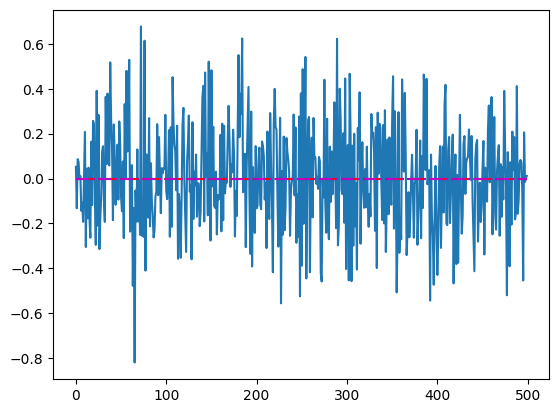

In [104]:
plt.plot(range(500), data_dict["eeg3"].iloc[0, :])
plt.plot(range(500), ensemble_mean * np.ones(500), "r--")

In [89]:
ensemble_var = np.mean(np.var(data_dict["eeg3"], axis=1))
time_var = np.mean(np.var(data_dict["eeg3"], axis=0))
participant_vars = np.var(data_dict["eeg3"], axis=1)

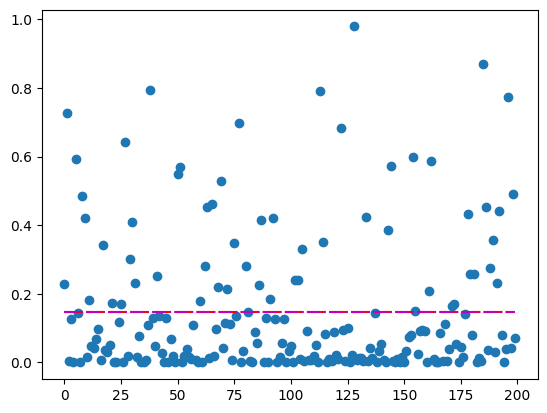

In [94]:
plt.scatter(range(200), participant_vars)
plt.plot(range(200), ensemble_var * np.ones(200), "r--")
plt.plot(range(200), time_var * np.ones(200), "m-.")

In [133]:
subsample_sizes = 2**np.linspace(2, 7, 6)

subsample_vars = {}
for i in subsample_sizes:
    sub_df = data_dict["eeg3"].iloc[:int(subsample_size), :]
    subsample_vars[i] = np.mean(np.var(sub_df, axis=1))

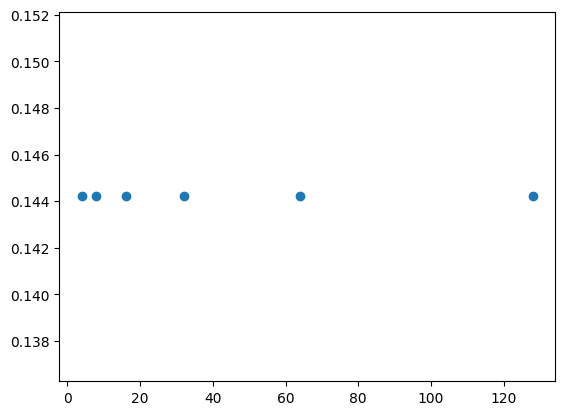

In [134]:
plt.scatter(subsample_vars.keys(), subsample_vars.values())

In [52]:
subsample_size = 100

# total-sample variance
total_var = np.var(eeg1, axis=1).sum()

# average squared subsample variance
avg_squared_sub_var = np.mean(np.var(eeg1.iloc[:subsample_size, :], axis=1)**2)

ergodicity_breaking = (avg_squared_sub_var - total_var) / total_var**2
ergodicity_breaking

-0.05029405344419248

In [56]:
# average squared subsample variance (fix)
np.var(eeg1, axis=1).sum()

9.489047719654886

## Task 2: signal sampling and SNR

A.

In [50]:
plt.rcParams["figure.figsize"] = [12, 3]

In [43]:
res = 1e-2
t = 4
f_alpha = 12
f_theta = 6

samples = np.arange(0, t, res)
signal_alpha = np.sin(2 * np.pi * f_alpha * samples[:len(samples)//2])
signal_theta = np.sin(2 * np.pi * f_theta * samples[len(samples)//2:])
signal = np.concatenate([signal_alpha, signal_theta])

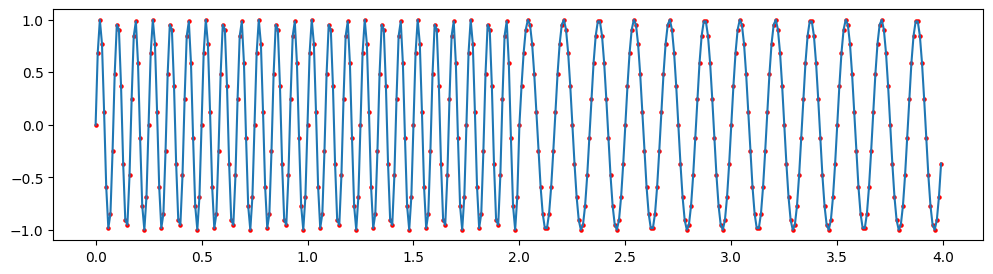

In [51]:
plt.plot(samples, signal)
plt.scatter(samples, signal, s=5, c="r")

B.

In [47]:
def make_bins(samples, signal, k, range=(0, 4)):

    bin_means, bin_edges, _ = stats.binned_statistic(
        samples, signal,
        statistic="mean",
        bins=len(samples) // k,
        range=range
    )

    return (bin_means, bin_edges)

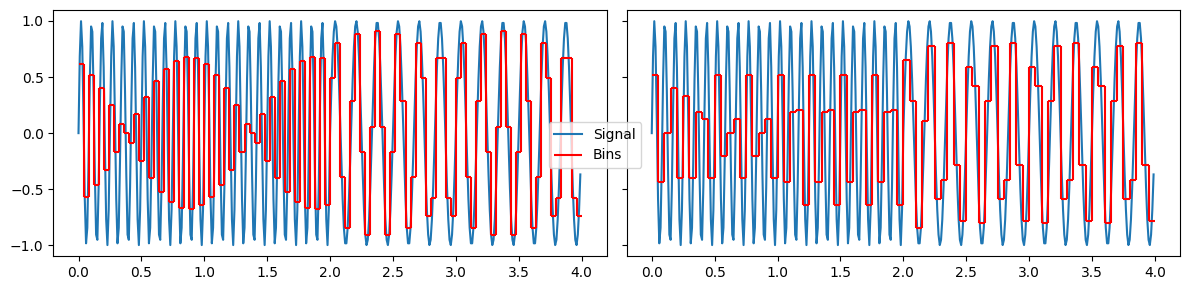

In [52]:
bin_means1, bin_edges1 = make_bins(samples, signal, 4)
bin_means2, bin_edges2 = make_bins(samples, signal, 5)

fig, axes = plt.subplots(1, 2, sharey=True)

axes[0].plot(samples, signal, label="Signal")
axes[0].hlines(bin_means1, bin_edges1[:-1], bin_edges1[1:], colors="r", label="Bins")
axes[0].vlines(bin_edges1[1:-1], bin_means1[:-1], bin_means1[1:], colors="r")

axes[1].plot(samples, signal)
axes[1].hlines(bin_means2, bin_edges2[:-1], bin_edges2[1:], colors="r")
axes[1].vlines(bin_edges2[1:-1], bin_means2[:-1], bin_means2[1:], colors="r")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center")

plt.tight_layout()

In [11]:
from tabulate import tabulate

# maybe it's good to check for the two waves separately
def MAE(signal, means, k):

    error = np.sum(np.abs((signal.reshape(-1, k) - means.reshape(-1, 1))))
    return error

res = [["Alpha MAE", MAE(signal[:200], bin_means1[:50], 4), MAE(signal[:200], bin_means2[:40], 5)],
       ["Theta MAE", MAE(signal[200:], bin_means1[50:], 4), MAE(signal[200:], bin_means2[40:], 5)],
       ["Total MAE", MAE(signal, bin_means1, 4), MAE(signal, bin_means2, 5)]]

col_names = ["4-sample bins", "5-sample bins"]

print(tabulate(res, headers=col_names, floatfmt=".2f"))

             4-sample bins    5-sample bins
---------  ---------------  ---------------
Alpha MAE            88.23           105.98
Theta MAE            47.06            59.46
Total MAE           135.29           165.45


C. Explain how the use of the wrong temporal resolution can lead to a confusion between the two oscillations.

D.

In [55]:
t = 2
res=1e-3

samples = np.arange(0, t, res)
signal = np.sin(2 * np.pi * f_alpha * samples)

phase_range = np.linspace(0, 2 * np.pi, 100)

In [54]:
def add_noise(samples, signal, phase_range, f_noise=50, ratio=0.88):

    noise_phase = np.random.choice(phase_range)
    noise = np.sin(2 * np.pi * f_noise * samples + noise_phase) / ratio
    noisy_signal = signal + noise

    return noisy_signal, noise

def compute_snr(signal, noise):
    
    snr = 10 * np.log10(np.mean(signal**2) / np.mean(noise**2))
    return snr

SNR: -1.01dB


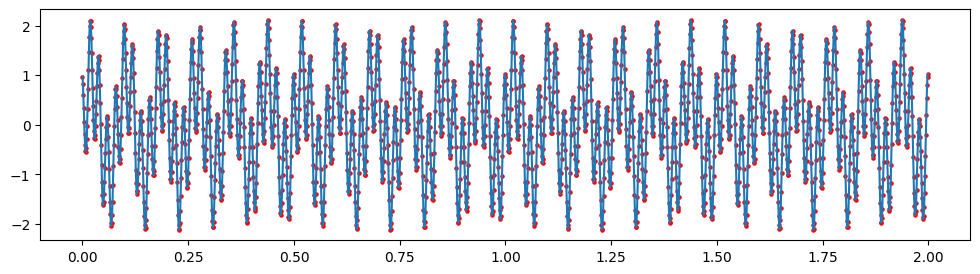

In [56]:
noisy_signal, noise = add_noise(samples, signal, phase_range, ratio=0.89)

print(f"SNR: {compute_snr(signal, noise):.2f}dB")

plt.plot(samples, noisy_signal)
plt.scatter(samples, noisy_signal, s=5, c="r")

E.

In [57]:
def simulate_experiment(n, samples, signal, phase_range):

    trials = []
    for trial in range(n):
        noisy_signal, _ = add_noise(samples, signal, phase_range)
        trials.append(noisy_signal)

    average_signal = np.mean(np.array(trials), axis=0)
    average_noise = average_signal - signal

    return average_signal, average_noise

SNR: 6.69dB


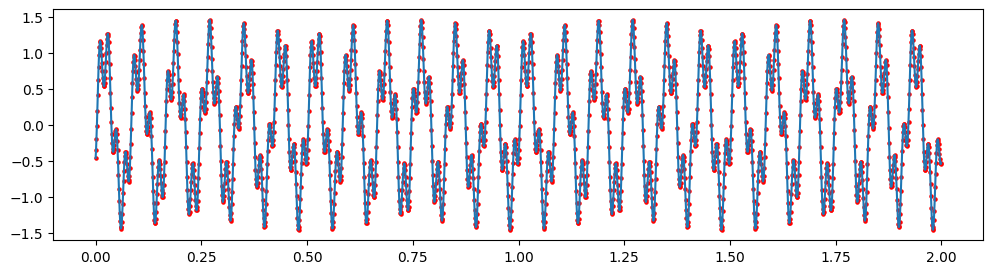

In [58]:
average_signal, average_noise = simulate_experiment(5, samples, signal, phase_range)
print(f"SNR: {compute_snr(signal, average_noise):.2f}dB")

plt.plot(samples, average_signal)
plt.scatter(samples, average_signal, s=5, c="r")

Text(0, 0.5, 'SNR (dB)')

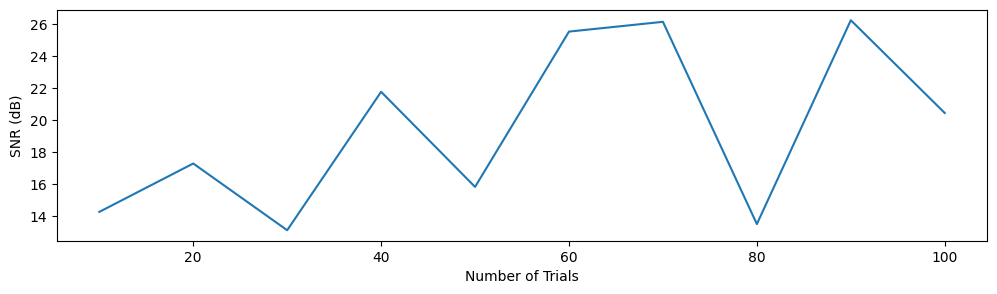

In [59]:
#phase_range = np.linspace(0, np.pi/2, 100)
# snr is very dependent on phase range
trials = np.linspace(10, 100, 10)
snrs = list(map(
    lambda n: compute_snr(signal, simulate_experiment(int(n), samples, signal, phase_range)[1]),
    trials
))

plt.plot(trials, snrs)
plt.xlabel("Number of Trials")
plt.ylabel("SNR (dB)")

## Task 3: firing rates and convolution

In this exercise, a neuronal spike train is averaged with various types of windows: non-sliding, sliding square and Gaussian windows. Results for the different methods are compared and discussed.

In [40]:
# Set figure dimensions
plt.rcParams["figure.figsize"] = [10, 3]

A. The data is initially imported and converted to a numpy array for easy manipulation.

In [3]:
# Import and tidy up data
spike_df = pd.read_csv("spike_times.csv", header=None).T
spike_df.columns = ["Time"]
spike_arr = spike_df["Time"].to_numpy()

The mean firing rate is known as _spike count rate_ and can be calculated with the formula $r(t) = \frac{number of spikes}{\Delta t}$ over the entire time period.

In [4]:
# Compute mean firing rate
firing_rate = len(spike_arr) / spike_arr[-1]
print(f"Mean firing rate: {firing_rate:.2f} spikes/s")

Mean firing rate: 32.91 spikes/s


B.　The first averaging method involves a non-sliding window, which is generated by the function defined below.

In [5]:
# Define function for computing and plotting firing rates with non-sliding window
def plot_window(spike_df, window, colors):
    
    edges = np.arange(0, 10.1, window)

    spike_df["Interval"] = np.floor(spike_df["Time"] / window).astype(int)
    spikes = spike_df.groupby("Interval")["Time"].count().to_numpy()

    if len(spikes) == len(edges):
        spikes = spikes[:-1]

    # Convert numbers of spikes to firing rates
    firing_rates = spikes / window

    plt.hlines(firing_rates, edges[:-1], edges[1:], colors=colors, label=window)
    plt.vlines(edges[1:-1], firing_rates[:-1], firing_rates[1:], colors=colors)

The average firing rates for window sizes of 0.2, 0.5, 1 and 3 seconds are then plotted jointly.

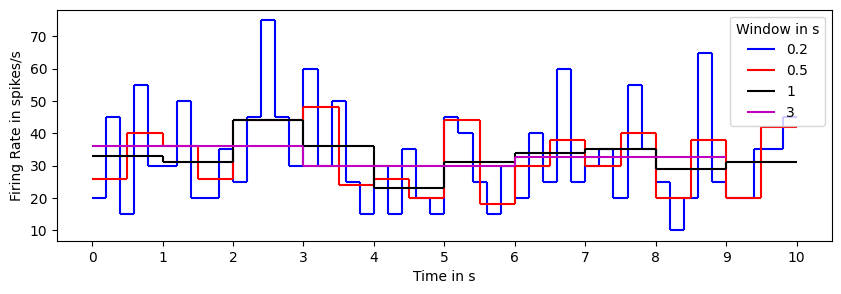

In [41]:
# Plot firing rates for different window sizes
plot_window(spike_df, 0.2, "b")
plot_window(spike_df, 0.5, "r")
plot_window(spike_df, 1, "k")
plot_window(spike_df, 3, "m")

plt.xlabel("Time in s")
plt.ylabel("Firing Rate in spikes/s")
plt.xticks(range(11))
plt.legend(title="Window in s")

Clearly, results are largely affected by variations in window size when using a non-sliding window. While the 0.2 and to a less extent the 0.5-second long windows still retain some information about the original spikes, windows equal or greater than 1 second no longer do due to the effect of averaging over such a wide time interval. Overall, for the given signal a shorter non-sliding window may be preferred over a longer one.

C. In this section, square sliding windows of various sizes are experimented.

In [36]:
# Check that no two spikes happen in the same millisecond (if so train should not be binary)
step = 0.001
samples = np.arange(0, 10 + step, step)
spike_arr = np.round(spike_arr, 3)
train = np.isin(samples, spike_arr).astype(int)

The second averaging method consists of a convolution between the spike train and a normalised square sliding window, whose size and resolution can be adjusted with the function below.

In [37]:
# Define function for computing and plotting firing rates with sliding square window
def plot_square(train, samples, window_size, c, step=0.001, mode="same"):

    window = np.ones(int(window_size / step))
    window /= sum(window)

    firing_rates = np.convolve(train, window, mode) / step

    plt.plot(samples, firing_rates, c=c, label=window_size)

Again, average firing rates are plotted for window sizes of 0.2, 0.5, 1 and 3 seconds. However, average firing rates are calculated every time the window slides forward by 1 millisecond.

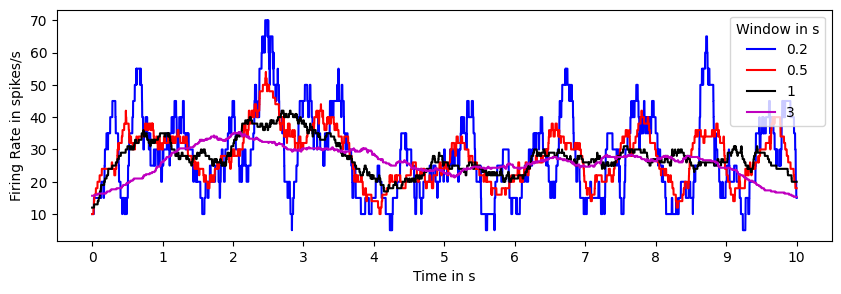

In [39]:
# Plot firing rates for different window sizes
plot_square(train, samples, 0.2, "b")
plot_square(train, samples, 0.5, "r")
plot_square(train, samples, 1, "k")
plot_square(train, samples, 3, "m")

plt.xlabel("Time in s")
plt.ylabel("Firing Rate in spikes/s")
plt.xticks(range(11))
plt.legend(title="Window in s", loc="upper right")

Also in the case of a sliding square window, results show strong sensitivity to the used window size, although they seem to maintain more information on the variable nature of the neuron than with a non-sliding window. In particular, the 0.5-second long window exhibited a relatively good signal-to-noise ratio, whereas the shorter window featured greater noise, and the longer ones were more biased towards the average firing rate and thus contained less information.


D.　The third averaging method entails a convolution between the spike train and a normalised Gaussian sliding window, whose span and standard deviation can be adjusted with the function below.

In [32]:
# Define function to calculate normal probability density of a quantile
def gaussian(x, mu=0, sigma=1):
    p = np.exp(-(x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return p

# Define function for computing and plotting firing rates with sliding normal window
def plot_gaussian(train, window_size, window_std, c, step=0.001):
    
    a = np.arange(0, window_size + step, step) - window_size / 2
    window = gaussian(a, sigma=window_std)
    window /= sum(window)

    firing_rates = np.convolve(train, window, "same") / step
    plt.plot(samples, firing_rates, c=c, label=f"m: {window_size}s, std: {window_std}s")


Average firing rates are now plotted over two gaussian sliding windows: with spans of 0.8 and 0.45 seconds and standard deviations of 0.25 and 0.1 seconds, respectively. As before, the windows slide forward every time by 1 millisecond.

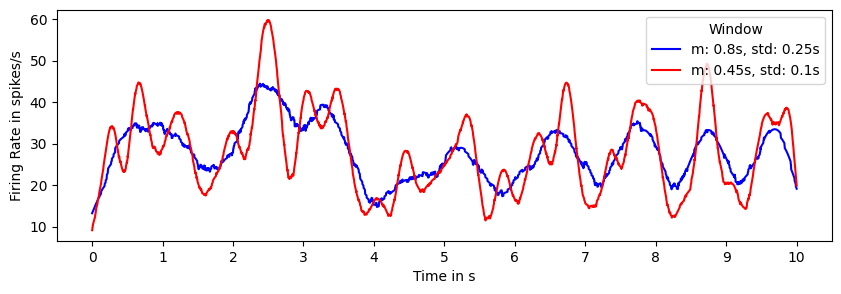

In [42]:
# Plot firing rates for different window spans and standard deviations
plot_gaussian(train, 0.8, 0.25, c="b")
plot_gaussian(train, 0.45, 0.1, c="r")

plt.xlabel("Time in s")
plt.ylabel("Firing Rate in spikes/s")
plt.xticks(range(11))
plt.legend(title="Window", loc="upper right")

Draw comparison between different gaussian windows.

E. Mention that differences within window types were described above, and here focus on comparisons across types, advantages and disadvantages of each type.

Longer windows may be particularly strict when great variation in firing rate is observed, because peaks are substantially smoothed.

## Task 4: tuning curves

## Bibliography

- Aatsinki, Anna-Katariina, et al. "Gut microbiota composition is associated with temperament traits in infants." Brain, behavior, and immunity 80 (2019): 849-858.